# Lecture 4 - Filtered Back Projection

## Contents

* The adjoint of the Radon transform
* Some usefull properties of the Radon transform
* Filtered back projection
* Assignments

## The adjoint of the Radon transform

* The Radon transform integrates along lines
* The adjoint smears the sinogram back along these lines

It is defined as

$$u(\mathbf{x}) = \frac{1}{2\pi}\int_{0}^{2\pi} f(\mathbf{x}\cdot \mathbf{n}_\theta,\theta) \mathrm{d}\theta,$$

and is equivalent to the transpose of the mastrix in the discrete setting.

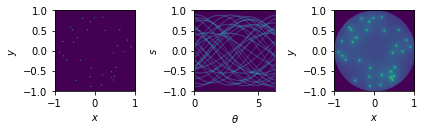

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk
from skimage.transform import radon, iradon

# settings
nx = 128
theta = np.linspace(0., 180., nx)

# phantom
mask = np.zeros((nx,nx))
ii,jj = disk((nx//2,nx//2),0.9 * (nx//2))
mask[ii,jj] = 1

u = np.zeros((nx,nx))
u = np.array(np.abs(np.random.randn(nx,nx)) >= 3, dtype=np.float)
u *= mask

# sinogram
f = radon(u, theta=theta)

# bp
u_bp = iradon(f, theta=theta, filter_name=None)

# plot
fig,ax = plt.subplots(1,3)

ax[0].imshow(u,extent=(-1,1,-1,1),vmin=0)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_aspect(1)

ax[1].imshow(f,extent=(0,2*np.pi,-1,1),vmin=0)
ax[1].set_xlabel(r'$\theta$')
ax[1].set_ylabel(r'$s$')
ax[1].set_aspect(np.pi)

ax[2].imshow(u_bp,extent=(-1,1,-1,1),vmin=0)
ax[2].set_xlabel(r'$x$')
ax[2].set_ylabel(r'$y$')
ax[2].set_aspect(1)

fig.tight_layout()

plt.savefig('./figures/lecture4/bp_dots.png',dpi=300)

![](./figures/lecture4/bp_dots.png)

## Some useful properties of the Radon transform

The second derivatices in $\mathbf{x}$ and $s$ intertwine with the Radon transform as follows 

$$R \Delta_\mathbf{x} u = \partial_s^2 R u, $$

and 

$$R^* \partial_s^2 f = \Delta_\mathbf{x} R^*f.$$


Furthermore

$$R^*\!R u = 2 \cdot (-\Delta_{\mathbf{x}})^{-1/2}u,$$

and

$$RR^* f = 2 \cdot (-\partial_s^2)^{-1/2} f.$$


This suggests we can invert the Radon transform via backprojection followed by 2D-filtering

$$u = \textstyle{\frac{1}{2}} \cdot (-\Delta_{\mathbf{x}})^{1/2} R^*f,$$

or 1D-filtering followed by backprojection

$$u = \textstyle{\frac{1}{2}} \cdot R^* (-\partial_s^2)^{1/2} f$$

## Filtered back projection

<iframe width="560" height="315" src="http://www.siltanen-research.net/IPexamples/slides/tomographic_imaging_with_full_data/SL_FBPrecon.mp4" frameborder="0" allowfullscreen></iframe>

(Courtesy of [Samuli Siltanen](http://www.siltanen-research.net/))

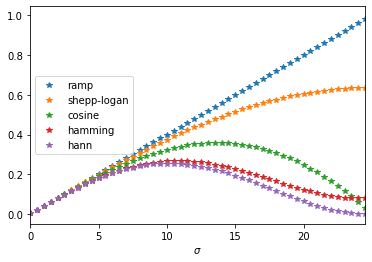

In [21]:
import matplotlib.pyplot as plt
from skimage.transform.radon_transform import _get_fourier_filter
from scipy.fft import fftfreq

filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']

n = 100
sigma = fftfreq(n, 2/n)

for ix, f in enumerate(filters):
    response = _get_fourier_filter(n, f)
    plt.plot(sigma,response,'*', label=f)

plt.xlim([0, np.max(sigma)])
plt.xlabel(r'$\sigma$')
plt.legend()
plt.savefig('./figures/lecture4/filters.png',dpi=300)

The filter is naturally defined through the Fourier transform as it is equivelant to multiplying by $|\sigma|$ in the Fourier domain.

![](./figures/lecture4/filters.png)

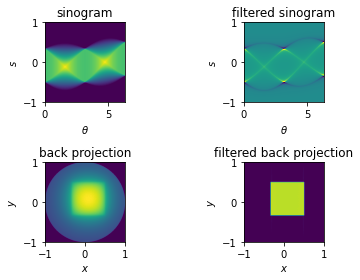

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk, rectangle
from skimage.transform import radon, iradon
from skimage.transform.radon_transform import _get_fourier_filter
from scipy.fft import fft, ifft, fftfreq, fftshift,ifftshift

# settings
nx = 512
theta = np.linspace(0., 180., nx)

# phantom
ii,jj = rectangle((nx//4,nx//3),end=(2*nx//3,3*nx//4))
u = np.zeros((nx,nx))
u[ii,jj] = 1

# sinogram
f = radon(u, theta=theta)

# filtered sinogram
filt = _get_fourier_filter(nx, 'ramp')
f_filter = np.real(ifft(filt * fft(f, axis=0),axis=0))

# backprojection
u_bp = iradon(f, theta=theta, filter_name=None)

# filtered backprojection
u_fbp = iradon(f_filter, theta=theta, filter_name=None)

# plot
fig,ax = plt.subplots(2,2)

ax[0,0].imshow(f,extent=(0,2*np.pi,-1,1),vmin=0)
ax[0,0].set_xlabel(r'$\theta$')
ax[0,0].set_ylabel(r'$s$')
ax[0,0].set_aspect(np.pi)
ax[0,0].set_title('sinogram')

ax[0,1].imshow(f_filter,extent=(0,2*np.pi,-1,1),vmin=-5,vmax=5)
ax[0,1].set_xlabel(r'$\theta$')
ax[0,1].set_ylabel(r'$s$')
ax[0,1].set_aspect(np.pi)
ax[0,1].set_title('filtered sinogram')

ax[1,0].imshow(u_bp,extent=(-1,1,-1,1),vmin=0)
ax[1,0].set_xlabel(r'$x$')
ax[1,0].set_ylabel(r'$y$')
ax[1,0].set_aspect(1)
ax[1,0].set_title('back projection')

ax[1,1].imshow(u_fbp,extent=(-1,1,-1,1),vmin=0)
ax[1,1].set_xlabel(r'$x$')
ax[1,1].set_ylabel(r'$y$')
ax[1,1].set_aspect(1)
ax[1,1].set_title('filtered back projection')

fig.tight_layout()

plt.savefig('./figures/lecture4/fbp.png',dpi=300)

![](./figures/lecture4/fbp.png)

## Assignments

### Assignment 1

Implement filtered back projection for various filters and test its performance on noisy data.